## <center>SMS Binary Classification(Spam/Ham)</center>
We use Multinomial Naive Bayes model to predict whether a given sms is spam or ham. We then build a Bernoulli Naive Bayes model and compare it with the Multinomial Naive Bayes model and choose the one which is giving higher specificity. We want to reduce the false positive rate so that's why we want the model with higher specificity. We were able to achieve 100 % specificity with Bernoulli Naive Bayes Classifier. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import sklearn
import statsmodels.api as sm

In [22]:
doc = pd.read_csv("smsspamcollection.csv", header=None)
doc.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preparation

In [23]:
doc["sms"] = doc[1]
doc.drop(columns=1, inplace=True)
doc["label"] = doc[0]
doc.drop(columns=0, inplace=True)

In [26]:
doc.label = doc.label.apply(lambda x : 1 if x == "spam" else 0)

In [27]:
doc.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


#### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(doc, random_state=100)

print(train_df.shape)
print(test_df.shape)

(4179, 2)
(1393, 2)


In [30]:
x_train = train_df.sms
y_train = train_df.label
x_test = test_df.sms
y_test = test_df.label

#### Bag of words representation

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vc = CountVectorizer(stop_words="english")

vc.fit(x_train)

CountVectorizer(stop_words='english')

In [43]:
len(vc.vocabulary_.keys())

7233

In [45]:
x_train_tf = vc.transform(x_train)
x_test_tf = vc.transform(x_test)

CountVectorizer by default gives the data in compressed sparse row matrix format instead of multi hot encoding due to large vocabulary size making each sample equal to the size of vocabulary. This format makes us save resources while have the same performance.

In [51]:
print(x_train_tf)

  (0, 793)	1
  (0, 1835)	1
  (0, 1868)	1
  (0, 3492)	1
  (0, 3511)	1
  (0, 4220)	1
  (0, 5651)	1
  (0, 6351)	1
  (1, 1140)	1
  (1, 2247)	1
  (1, 2269)	1
  (1, 2388)	2
  (1, 2987)	1
  (1, 3057)	2
  (1, 3118)	1
  (1, 3119)	1
  (1, 3364)	1
  (1, 3419)	1
  (1, 3526)	1
  (1, 3547)	1
  (1, 3641)	1
  (1, 3661)	1
  (1, 3992)	2
  (1, 4056)	1
  (1, 4093)	1
  :	:
  (4174, 5337)	1
  (4174, 6136)	1
  (4174, 6320)	1
  (4174, 6491)	1
  (4174, 6731)	1
  (4175, 1552)	1
  (4175, 1789)	1
  (4175, 2027)	1
  (4175, 3008)	1
  (4175, 3820)	1
  (4176, 1661)	1
  (4176, 3032)	1
  (4176, 3567)	1
  (4176, 3625)	1
  (4176, 4238)	1
  (4176, 4303)	1
  (4176, 5245)	1
  (4176, 5613)	1
  (4177, 2360)	1
  (4177, 3581)	1
  (4177, 3940)	1
  (4177, 6248)	1
  (4178, 789)	1
  (4178, 3148)	1
  (4178, 5414)	1


In [52]:
x_train_tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
x_train_tf.shape

(4179, 7233)

There are 4179 samples, each sample is a vector of 7233 dimensions, where each index denotes a unique word in all the train documents combined, the word which exists in a particular sample have value of 1 and 0 if it is not present in the document. We use the compressed sparse row matrix form instead of array form to save space

### Multinomial Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(x_train_tf, y_train)

y_train_pred = mnb.predict(x_train_tf)

mnb.predict_proba(x_train_tf)

array([[9.98648712e-01, 1.35128797e-03],
       [1.00000000e+00, 7.45551335e-12],
       [9.99999930e-01, 7.04435379e-08],
       ...,
       [9.99996580e-01, 3.42012665e-06],
       [9.96215264e-01, 3.78473575e-03],
       [9.99557836e-01, 4.42163926e-04]])

#### Laplace Smoothing
In order to prevent zeroeing out of probabilities, we use laplace smoothing which means that we increase the count of every word by one and consequently total count by the number of words so that the internal relation of probabilities remain the same, only the posterior probability is prevented from becoming zero.

In [61]:
mnb.alpha # laplace smoothing

1.0

### Model Evaluation

In [85]:
y_test_pred = mnb.predict(x_test_tf)
y_test_pred_proba = mnb.predict_proba(x_test_tf)

In [86]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy =", round(acc, 3)*100, "%")

Accuracy = 98.5 %


In [87]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

array([[1197,    9],
       [  12,  175]], dtype=int64)

In [88]:
tn = cm[0, 0]
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]

In [89]:
sn = 1.0 * tp / (tp + fn)
print("Sensitivity =", round(sn, 3))

Sensitivity = 0.936


In [90]:
sp = 1.0 * tn / (tn + fp)
print("Specificity =", round(sp, 3))

Specificity = 0.993


Specificity is the ratio of correctly predicted hams to total hams so our goal is to increase the specificity or decrease the false positive rate which is 1 - specificity. With 0.993 specificity, in 100 sms, the model will predict 0.7 ham sms as spam.

In [91]:
pc = metrics.precision_score(y_test, y_test_pred)
print("Precision =", round(pc, 3))

Precision = 0.951


In [92]:
rc = metrics.recall_score(y_test, y_test_pred)
print("Recall =", round(rc, 3))

Recall = 0.936


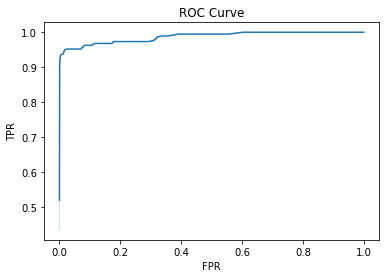

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba[:, 1])

rc = pd.DataFrame({"Threshold":thresholds, "FPR":fpr, "TPR":tpr})
plt.title("ROC Curve")
sns.lineplot(x="FPR", y="TPR", data=rc)
plt.show()

### Bernoulli Naive Bayes

In [106]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(x_train_tf, y_train)

y_train_pred = bnb.predict(x_train_tf)

y_train_pred_proba = bnb.predict_proba(x_train_tf)

In [107]:
y_test_pred = bnb.predict(x_test_tf)
y_test_pred_proba = bnb.predict_proba(x_test_tf)

In [108]:
acc_2 = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy =", round(acc_2, 3) * 100, "%")

Accuracy = 97.39999999999999 %


In [111]:
cm_2 = metrics.confusion_matrix(y_test, y_test_pred)
cm_2

array([[1205,    1],
       [  35,  152]], dtype=int64)

In [112]:
tp = cm_2[1, 1]
fp = cm_2[0, 1]
fn = cm_2[1, 0]
tn = cm_2[0, 0]

In [113]:
sn_2 = 1.0 * tp / (tp + fn)
print("Sensitivity =", round(sn_2, 3))

Sensitivity = 0.813


In [118]:
sp_2 = 1.0 * tn / (tn * fp)
print("Specificity =", sp_2)

Specificity = 1.0


Specificity for Bernoulli Naive Bayes is perfect, which means it categorizes all the ham sms as ham for test dataset. So, for the business use case, BNB is better.